<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./251_Sentinel-3_OLCI_L1_load_browse.ipynb"><< 251 - Sentinel-3 OLCI - Level 1</a><span style="float:right;"><a href="./253_Sentinel-3_SLSTR_NRT_AOD_load_browse.ipynb">253 - Sentinel-3 SLSTR NRT - Aerosol Optical Depth >></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA DISCOVERY</b></div>

<div class="alert alert-block alert-success">

<b>SEE ALSO</b>

* **30 - CASE STUDIES**
 - [322 - Case study - Californian fires - Summer 2020](../30_case_studies/322_Californian_fires_summer_2020_case_study.ipynb) 
  - [331 - Case study - Sentinel-3 SLSTR NRT - Fire Radiative Power - Chernobly fires - May 2020](../30_case_studies/331_Sentinel-3_SLSTR_NRT_FRP_Chernobyl_fires_case_study.ipynb)
  - [332 - Case study - Sentinel-3 SLSTR NRT - Fire Radiative Power - Californian fires - September 2020](../30_case_studies/332_Sentinel-3_SLSTR_NRT_FRP_Californian_fires_case_study.ipynb)

    
* **40 - EXERCISES**
  - [422 - Exercise - Sentinel-3 SLSTR NRT Fire Radiative Power](../40_exercises/422_Sentinel-3_SLSTR_NRT_FRP_exercise.ipynb)

</div>

<hr>

# 2.5.2 Copernicus Sentinel-3 SLSTR NRT - Fire Radiative Power (FRP) - Load and browse

The [Copernicus Sentinel-3 SLSTR Near-Real-Time Fire Radiative Power (FRP)](https://navigator.eumetsat.int/product/EO:EUM:DAT:0207) product identifies the location and quantifies the radiative power of any hotspot present on land and ocean, that radiates a heating signal within a pixel size of 1 km<sup>2</sup>.

All threatening hotspots are identified and characterised within three hours from SLSTR observation sensing time.
The current version of the Near-Real-Time (NRT) S3 FRP processor is mainly applicable during the night while only a few daytime granules, with non-saturated background (i.e. no fires) radiance, are processed at this stage. The NRT S3 FRP product will become operational after a higher level of quality and maturity is reached, including the full processing of granules during daytime, a comprehensive global validation, and positive feedback by experts and users.

Get more product specifications [here](https://www.eumetsat.int/website/home/News/DAT_4962463.html).

The notebook shows an example of the Australian Fires in January 2020.

#### This module has the following outline:
* [1 - Load Sentinel-3 SLSTR NRT FRP data](#load_s3_frp)
* [2 - Load, mask and regrid NRT FRP computed from MWIR channel (3.7 um)](#load_mwir)
* [3 - Load, mask and regrid NRT FRP computed from SWIR channel (2.25 um)](#load_swir)
* [4 - Load, mask and regrid NRT FRP computed from SWIR channel (2.25 um) with SAA filter applied](#load_swir_nosaa)

<br>

#### Load required libraries

In [3]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='load_s3_frp'></a>Load Sentinel-3 SLSTR Near-Real-Time FRP data

Sentinel-3 SLSTR NRT FRP data are disseminated  in `netCDF` format. The first step is to load the data file with xarray's `xr.open_dataset()` function.


Once the data file is loaded, you see that the data file has three dimensions: `columns`, `fires` and `rows`. The data and additional information, such as quality flags or latitude and longitude information, is stored as data variables.

There are three variables of interest:
- `FRP_MWIR` - Fire Radiative Power computed from MWIR channel (3.7 um) [MW]
- `FRP_SWIR` - Fire Radiative Power computed from SWIR channel (2.25 um) [MW]
- `FLAG_SWIR_SAA` - Flag values to filter out South Atlantic Anomalies (SAA) & other transient / spurious events, only applicable to FRP SWIR

The channels differ in the type of fire they can detect. The `FRP_MWIR` channel detects less intensive fires with a temperature lower than 1100 Kelvin, whereas the `FRP_SWIR` channel detects fires with higher temperatures (>1100 Kelvin).

In [3]:
frp_dir = '../eodata/sentinel3/slstr/frp/'
frp_xr = xr.open_dataset(frp_dir+'FRP_in.nc')
frp_xr

<xarray.Dataset>
Dimensions:                 (columns: 1500, fires: 2199, rows: 1200)
Dimensions without coordinates: columns, fires, rows
Data variables:
    i                       (fires) int16 ...
    j                       (fires) int32 ...
    time                    (fires) datetime64[ns] ...
    latitude                (fires) float64 ...
    longitude               (fires) float64 ...
    FRP_MWIR                (fires) float64 ...
    FRP_uncertainty_MWIR    (fires) float64 ...
    transmittance_MWIR      (fires) float64 ...
    FRP_SWIR                (fires) float64 ...
    FRP_uncertainty_SWIR    (fires) float64 ...
    FLAG_SWIR_SAA           (fires) int16 ...
    transmittance_SWIR      (fires) float64 ...
    confidence              (fires) float64 ...
    classification          (fires) uint8 ...
    S7_Fire_pixel_radiance  (fires) float32 ...
    F1_Fire_pixel_radiance  (fires) float32 ...
    used_channel            (fires) uint8 ...
    Radiance_window         (fires) float32 ...
    Glint_angle             (fires) float64 ...
    IFOV_area               (fires) float64 ...
    TCWV                    (fires) float64 ...
    n_window                (fires) int16 ...
    n_water                 (fires) int16 ...
    n_cloud                 (fires) int16 ...
    n_SWIR_fire             (fires) float32 ...
    flags                   (rows, columns) uint32 ...
Attributes:
    title:                  SLSTR Level 2 Product, Fire Radiative Power measu...
    comment:                 
    netCDF_version:         4.2 of Jul  5 2012 17:07:43 $
    product_name:           S3A_SL_2_FRP____20191205T124414_20191205T124714_2...
    institution:            MAR
    source:                 IPF-SL-2-FRP 02.00
    history:                 
    references:             EUM/RSP/DOC/20/1169482 - EUMETSAT - SLSTR L2 NRT ...
    contact:                ops@eumetsat.int
    creation_time:          2020-03-20T07:15:45Z
    resolution:             [ 1000 1000 ]
    absolute_orbit_number:  19788
    start_time:             2019-12-05T12:44:13.805030Z
    stop_time:              2019-12-05T12:47:13.805030Z
    track_offset:           998
    start_offset:           36043

#### Load `latitude` and `longitude` information

You can already load the `latitude` and `longitude` information, which will be required later for the regridding process.

In [12]:
lat_frp = frp_xr['latitude']
lat_frp

lon_frp = frp_xr['longitude']
lon_frp

<xarray.DataArray 'longitude' (fires: 2199)>
array([147.968793, 147.989192, 147.969673, ..., 152.274224, 152.23271 ,
       152.121764])
Dimensions without coordinates: fires
Attributes:
    long_name:      Longitude
    standard_name:  longitude
    units:          degrees_east
    valid_min:      -180.0
    valid_max:      180.0

#### Define variables for `plotting` and `gridding`

Let us also define some variables for `plotting` and the `regridding` process. For example the sampling size of the gridded FRP values or the geographical extent.

Let us set the geographical extent to Australia's east coast and define a 0.15 deg x 0.15 deg grid regular spaced grid.

In [13]:
sampling_lat_FRP_grid = 0.15        # Sampling for gridded FRP values & differenrce  stats computation 
sampling_lon_FRP_grid = 0.15        # Sampling for gridded FRP values & differenrce  stats computation 
FRP_plot_max_grid     = 40.         # Max Integrated FRP value, for plots


lat_min               = -35.        # Minimum latitude for mapping plot [deg N]
lat_max               = -19.        # Maximum latitude for mapping plot [deg N]
lon_min               = 144.        # Minimum lonitude for mapping plot [deg E]
lon_max               = 154.        # Maximum lonitude for mapping plot [deg E]

Now, let us go through the three different variables (`MWIR`, `SWIR` and `SWIR with SAA filtered out`) and let us load, mask, regrid and visualize them.

<br>

## <a id='load_mwir'></a>Load, mask and regrid `FRP computed from MWIR channel (3.7 um)`

The first step is to load the `FRP_MWIR` data variable from the loaded `netCDF` file. You, see that a total of 2199 fire occurrences were identified. This includes also FRP pixels with reduced quality. To retrieve the actual number of fires identified by the `MWIR channels`, you have to mask out non-valid pixels.

In [14]:
frp_mwir = frp_xr['FRP_MWIR']
frp_mwir

<xarray.DataArray 'FRP_MWIR' (fires: 2199)>
array([ 5.028017,  5.864981, 22.875036, ...,  5.890463, 16.979572,  2.290077])
Dimensions without coordinates: fires
Attributes:
    long_name:  Fire radiative power computed from MWIR channels (S7 and F1)
    units:      MW

The next step is to mask out FRP pixels with reduced quality. Valid pixels are different to -1. You can use the function [generate_masked_array](../functions.ipynb#generate_masked_array) to extract pixels of high quality.
You want to keep all pixels that are `not equal to (!=)` -1. 

A total of 2102 fire occurrences were identified by the `MWIR channels`. Fires identified by the `MWIR channels - S7 and F1` detect fires with a temperature lower than 1100 Kelvin.

In [15]:
masked_frp_mwir = generate_masked_array(frp_mwir, frp_mwir, -1.,operator='!=', drop=True)
masked_frp_mwir


<xarray.DataArray 'FRP_MWIR' (fires: 2102)>
array([ 5.02801747,  5.86498118, 22.87503649, ...,  5.89046261,
       16.97957191,  2.29007706])
Dimensions without coordinates: fires
Attributes:
    long_name:  Fire radiative power computed from MWIR channels (S7 and F1)
    units:      MW

Let us retrieve the number of hotspots (fires) in total and per category. The total number of fires is 2199 and the number of fires from the MWIR channels is 2102.

In [16]:
n_fire_tot           = len(lat_frp[:])
n_fire_MWIR          = len(masked_frp_mwir.to_masked_array().compressed())

n_fire_tot, n_fire_MWIR

(2199, 2102)

### Generate a gridded FRP array

The loaded `xarray.DataArray` is a one-dimensional array (list) of the 2102 fire occurences that were identified. The next step is to combine the fire occurrences with the geographcial coordinates and to bring the information onto a regular grid to create gridded FRP information. The gridded FRP is the integration (sum) of FRP within a grid cell.
You can define a function called [slstr_frp_gridding](../functions#slstr_frp_gridding) and you can then reuse it to apply it for other channel information.

In [17]:
def slstr_frp_gridding(parameter_array, 
                       parameter, 
                       lat_min, lat_max, lon_min, lon_max, 
                       sampling_lat_FRP_grid, 
                       sampling_lon_FRP_grid,
                       n_fire,
                       lat_frp,
                       lon_frp,
                       **kwargs):
    """ 
    Produces gridded data of Sentinel-3 SLSTR NRT Fire Radiative Power Data
    
    Parameters:
        parameter_array (xarray DataArray):
        parameter (str): NRT S3 FRP channel - either `mwir`, `swir` or `swir_nosaa`
        lat_min, lat_max, lon_min, lon_max(float): Floats of geographical bounding box
        sampling_lat_FRP_grid, sampling_long_FRP_grid(float): Float of grid cell size
        n_fire (int): Number of fire occurences
        lat_frp (xarray DataArray): Latitude values of occurred fire events
        lon_frp (xarray DataArray): Longitude values of occurred fire events
        **kwargs: additional keyword arguments to be added

    Returns:
        the gridded data array and latitude and longitude grid information
    """ 
    n_lat = int( (np.float32(lat_max) - np.float32(lat_min)) / sampling_lat_FRP_grid ) + 1 # Number of rows per latitude sampling
    n_lon = int( (np.float32(lon_max) - np.float32(lon_min)) / sampling_lon_FRP_grid ) + 1 # Number of lines per longitude sampling

    
    slstr_frp_gridded = np.zeros( [n_lat, n_lon], dtype='float32' ) - 9999.

    lat_grid = np.zeros( [n_lat, n_lon], dtype='float32' ) - 9999.
    lon_grid = np.zeros( [n_lat, n_lon], dtype='float32' ) - 9999.
    
    if (n_fire >= 0):
    
    # Loop on i_lat: begins
        for i_lat in range(n_lat):
                    
        # Loop on i_lon: begins
            for i_lon in range(n_lon):
                        
                lat_grid[i_lat, i_lon] = lat_min + np.float32(i_lat) * sampling_lat_FRP_grid + sampling_lat_FRP_grid / 2.
                lon_grid[i_lat, i_lon] = lon_min + np.float32(i_lon) * sampling_lon_FRP_grid + sampling_lon_FRP_grid / 2.
                            
            # Gridded SLSTR FRP MWIR Night - All days
                if(parameter=='swir_nosaa'):
                    FLAG_FRP_SWIR_SAA_nc = kwargs.get('flag', None)
                    mask_grid = np.where( 
                        (lat_frp[:] >= lat_min + np.float32(i_lat) * sampling_lat_FRP_grid)  & 
                        (lat_frp[:] < lat_min + np.float32(i_lat+1) * sampling_lat_FRP_grid) & 
                        (lon_frp[:] >= lon_min + np.float32(i_lon) * sampling_lon_FRP_grid)  & 
                        (lon_frp[:] < lon_min + np.float32(i_lon+1) * sampling_lon_FRP_grid) &
                        (parameter_array[:] != -1.) & (FLAG_FRP_SWIR_SAA_nc[:] == 0), False, True)
                else:
                    mask_grid = np.where( 
                        (lat_frp[:] >= lat_min + np.float32(i_lat) * sampling_lat_FRP_grid)  & 
                        (lat_frp[:] < lat_min + np.float32(i_lat+1) * sampling_lat_FRP_grid) & 
                        (lon_frp[:] >= lon_min + np.float32(i_lon) * sampling_lon_FRP_grid)  & 
                        (lon_frp[:] < lon_min + np.float32(i_lon+1) * sampling_lon_FRP_grid) &
                        (parameter_array[:] != -1.),  False, True)
                            
                masked_slstr_frp_grid = np.ma.array(parameter_array[:], mask=mask_grid)
                            
                if len(masked_slstr_frp_grid.compressed()) != 0:
                    slstr_frp_gridded[i_lat, i_lon]  = np.sum(masked_slstr_frp_grid.compressed())
    return slstr_frp_gridded, lat_grid, lon_grid
    

Apply the function [slstr_frp_gridding](../functions.ipynb#slstr_frp_gridding) to the `frp_mwir` data array.

In [18]:
FRP_MWIR_grid, lat_grid, lon_grid = slstr_frp_gridding(parameter_array=frp_mwir, 
                                                       parameter='mwir', 
                                                       lat_min=lat_min,
                                                       lat_max=lat_max, 
                                                       lon_min=lon_min, 
                                                       lon_max=lon_max, 
                                                       sampling_lat_FRP_grid=sampling_lat_FRP_grid,
                                                       sampling_lon_FRP_grid=sampling_lon_FRP_grid, 
                                                       n_fire=n_fire_MWIR,
                                                       lat_frp=lat_frp,
                                                       lon_frp=lon_frp)
FRP_MWIR_grid, lat_grid, lon_grid

(array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
       dtype=float32),
 array([[-34.925, -34.925, -34.925, ..., -34.925, -34.925, -34.925],
        [-34.775, -34.775, -34.775, ..., -34.775, -34.775, -34.775],
        [-34.625, -34.625, -34.625, ..., -34.625, -34.625, -34.625],
        ...,
        [-19.325, -19.325, -19.325, ..., -19.325, -19.325, -19.325],
        [-19.175, -19.175, -19.175, ..., -19.175, -19.175, -19.175],
        [-19.025, -19.025, -19.025, ..., -19.025, -19.025, -19.025]],
       dtype=float32),
 array([[144.075, 144.225, 144.375, ..., 153.675, 153.825, 153.975],
        [144.075, 144.225, 144.375, ..., 153.675, 153.825, 153.97

Mask out the invalid pixels (pixels that are equal to -9999.) for plotting. You can use numpy's function `np.ma.masked_array()` for this.

In [20]:
mask_valid = np.where(FRP_MWIR_grid[:,:] != -9999., False, True)
D_mwir = np.ma.masked_array(FRP_MWIR_grid[:,:], mask=mask_valid)
D_mwir

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

Calculate some statistics and add them to a string in order to integrate the information with the final plot.

In [21]:
textstr_1 = 'Total number 1km hot-spots = ' + str(n_fire_MWIR)

FRP_sum      = np.sum(masked_frp_mwir.to_masked_array().compressed())
FRP_mean     = np.mean(masked_frp_mwir.to_masked_array().compressed())
FRP_std      = np.std(masked_frp_mwir.to_masked_array().compressed())
FRP_min      = np.min(masked_frp_mwir.to_masked_array().compressed())
FRP_max      = np.max(masked_frp_mwir.to_masked_array().compressed())

FRP_sum_str  = '%.1f' % FRP_sum
FRP_mean_str = '%.1f' % FRP_mean
FRP_std_str  = '%.1f' % FRP_std
FRP_min_str  = '%.1f' % FRP_min
FRP_max_str  = '%.1f' % FRP_max

textstr_2 = 'FRP 1 km: \n Total = '+FRP_sum_str+' [MW] \n Avg. = '+ FRP_mean_str + ' [MW] \n Min = ' + FRP_min_str + ' [MW] \n Max = ' + FRP_max_str + ' [MW]'



### Visualize the masked data array with matplotlib's `pcolormesh()` function

You can define a function for the plotting code, so you can easily be re-used to plot other FRP data variables. Let us create a function called [visualize_s3_frp](../functions.ipynb#visualize_s3_frp) which makes use of matplotlib's `pcolormesh` function and `Cartopy` and integrates the text information created above into the plot.

In [43]:
def visualize_s3_frp(data, lat, lon, unit, longname, textstr_1, textstr_2, vmax):
    """ 
    Visualizes a numpy array (Sentinel-3 data) with matplotlib's 'pcolormesh' function.
    
    Parameters:
        data (numpy MaskedArray): any numpy MaskedArray, e.g. loaded with the NetCDF library and the Dataset function
        lat (numpy Array): array with longitude values
        lon (numpy Array) : array with latitude values
        unit (str): unit of the resulting plot
        longname (str): Longname to be used as title
        textstr_1 (str): String to fill box 1
        textstr_2 (str): String to fill box 2
        vmax (float): Maximum value of color scale
    """    
    fig=plt.figure(figsize=(20, 15))

    ax = plt.axes(projection=ccrs.PlateCarree())

    img = plt.pcolormesh(lon, lat, data, 
                        cmap=cm.autumn_r, transform=ccrs.PlateCarree(),
                        vmin=0,
                        vmax=vmax)

    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.bottom_labels=False
    gl.right_labels=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    gl.xlabel_style={'size':14}
    gl.ylabel_style={'size':14}

    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.029, pad=0.025)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(longname, fontsize=20, pad=40.0) 

    props = dict(boxstyle='square', facecolor='white', alpha=0.5)

    # place a text box on the right side of the plot
    ax.text(1.1, 0.9, textstr_1, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

    props = dict(boxstyle='square', facecolor='white', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(1.1, 0.85, textstr_2, transform=ax.transAxes, fontsize=16,
            verticalalignment='top', bbox=props)
    plt.show()

                                

Now, you can apply the function [visualize_s3_frp](../functions.ipynb#visualize_s3_frp) and plot the `Fire Radiative Power computed from MWIR channels`. Additionally, you can take information such as `longname` or `units` from the data variable attributes.

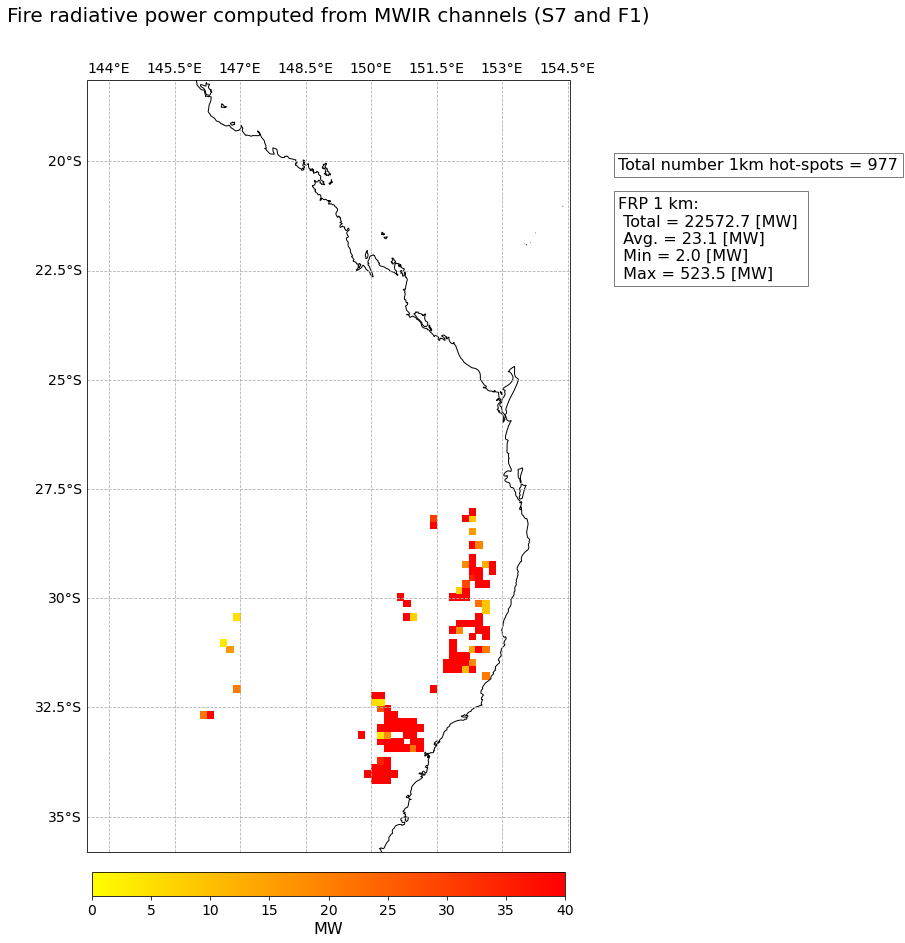

In [47]:
long_name = frp_mwir.long_name
unit = frp_mwir.units
vmax = FRP_plot_max_grid

visualize_s3_frp(data=D_mwir[:,:],
                 lat=lat_grid, 
                 lon=lon_grid, 
                 unit=unit, 
                 longname=long_name, 
                 textstr_1=textstr_1, 
                 textstr_2=textstr_2, 
                 vmax=FRP_plot_max_grid)

<br>

Let us now repeat the processing steps above and let us process and visualize the `Fire Radiative Power computed from the SWIR channel`, which identifies fires with a temperature higher than 1100 Kelvin.

## <a id='load_swir'></a>Load, mask and regrid `FRP computed from the SWIR channel (2.25 um)`

Load the `FRP_SWIR` data variable from the loaded `netCDF` file.

In [29]:
frp_swir = frp_xr['FRP_SWIR']
frp_swir

<xarray.DataArray 'FRP_SWIR' (fires: 2199)>
array([-1.      , -1.      , 12.613456, ..., -1.      , -1.      , -1.      ])
Dimensions without coordinates: fires
Attributes:
    long_name:  Fire radiative power computed from SWIR channel (S6)
    units:      MW

Filter only valid pixels and filter out all pixels that are `not equal to (!=)` -1. You see that a total of 1002 fires with a temperature higher than 1000 Kelvin were identified.

In [31]:
masked_frp_swir = generate_masked_array(frp_swir, frp_swir, -1., operator='!=', drop=True)
masked_frp_swir

<xarray.DataArray 'FRP_SWIR' (fires: 1002)>
array([12.61345629,  6.75140016,  4.00950638, ..., 21.42250591,
        8.46091641,  3.15951158])
Dimensions without coordinates: fires
Attributes:
    long_name:  Fire radiative power computed from SWIR channel (S6)
    units:      MW

Compute the number of total fires and per category.

In [32]:
n_fire_tot           = len(lat_frp[:])
n_fire_SWIR          = len(masked_frp_swir.to_masked_array().compressed())

n_fire_tot, n_fire_SWIR

(2199, 1002)


Apply the gridding function [slstr_frp_gridding](../functions.ipynb#slstr_frp_gridding) and bring the one-dimensional list of identified fire hotspots from the `SWIR channel` onto a regular-spaced grid.

In [33]:
FRP_SWIR_grid, lat_grid, lon_grid = slstr_frp_gridding(parameter_array=frp_swir, 
                                                       parameter='swir', 
                                                       lat_min=lat_min, 
                                                       lat_max=lat_max, 
                                                       lon_min=lon_min, 
                                                       lon_max=lon_max, 
                                                       sampling_lat_FRP_grid=sampling_lat_FRP_grid,
                                                       sampling_lon_FRP_grid=sampling_lon_FRP_grid, 
                                                       n_fire=n_fire_SWIR,
                                                       lat_frp=lat_frp,
                                                       lon_frp=lon_frp)

FRP_SWIR_grid, lat_grid, lon_grid

(array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
       dtype=float32),
 array([[-34.925, -34.925, -34.925, ..., -34.925, -34.925, -34.925],
        [-34.775, -34.775, -34.775, ..., -34.775, -34.775, -34.775],
        [-34.625, -34.625, -34.625, ..., -34.625, -34.625, -34.625],
        ...,
        [-19.325, -19.325, -19.325, ..., -19.325, -19.325, -19.325],
        [-19.175, -19.175, -19.175, ..., -19.175, -19.175, -19.175],
        [-19.025, -19.025, -19.025, ..., -19.025, -19.025, -19.025]],
       dtype=float32),
 array([[144.075, 144.225, 144.375, ..., 153.675, 153.825, 153.975],
        [144.075, 144.225, 144.375, ..., 153.675, 153.825, 153.97

Mask out all invalid pixels (pixels that are equal to -9999.) for plotting.

In [34]:
mask_valid = np.where(FRP_SWIR_grid[:,:] != -9999., False, True)
D_swir          = np.ma.masked_array(FRP_SWIR_grid[:,:], mask=mask_valid)

Calculate some statistics and add them to a string that can be integrated with the final plot.

In [35]:
textstr_1 = 'Total number 1km hot-spots = ' + str(n_fire_SWIR)


FRP_sum      = np.sum(masked_frp_swir.to_masked_array().compressed())
FRP_mean     = np.mean(masked_frp_swir.to_masked_array().compressed())
FRP_std      = np.std(masked_frp_swir.to_masked_array().compressed())
FRP_min      = np.min(masked_frp_swir.to_masked_array().compressed())
FRP_max      = np.max(masked_frp_swir.to_masked_array().compressed())

FRP_sum_str  = '%.1f' % FRP_sum
FRP_mean_str = '%.1f' % FRP_mean
FRP_std_str  = '%.1f' % FRP_std
FRP_min_str  = '%.1f' % FRP_min
FRP_max_str  = '%.1f' % FRP_max

textstr_2 = 'FRP 1 km: \n Total = '+FRP_sum_str+' [MW] \n Avg. = '+ FRP_mean_str + ' [MW] \n Min = ' + FRP_min_str + ' [MW] \n Max = ' + FRP_max_str + ' [MW]'



Apply the plotting function [visualize_s3_frp](../functions.ipynb#visualize_s3_frp) and make use of the attributes `units` and `long_name` provided by the data variable.

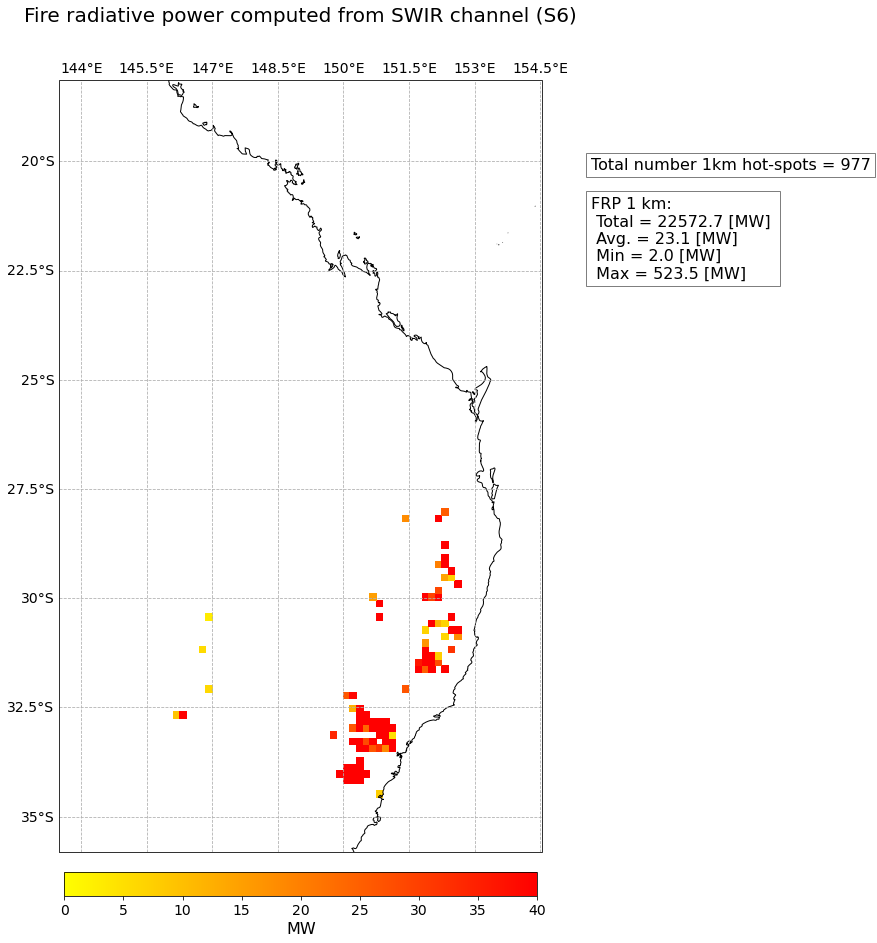

In [46]:
long_name = frp_swir.long_name
unit = frp_swir.units
vmax = FRP_plot_max_grid

visualize_s3_frp(data=D_swir[:,:],
                 lat=lat_grid, 
                 lon=lon_grid, 
                 unit=unit, 
                 longname=long_name, 
                 textstr_1=textstr_1, 
                 textstr_2=textstr_2, 
                 vmax=FRP_plot_max_grid)

<br>

Let us repeat the same processing steps for the variable `FRP computed from SWIR channel`, but with the SAA filter applied.

<br>

## <a id='load_swir_nosaa'></a> Load, mask and regrid `FRP computed from SWIR channel (2.25 um) with SAA filter applied`

Load the flag for the `South Atlantic Anomaly (SAA)` with the data variable name `FLAG_SWIR_SAA`. 

In [37]:
FLAG_FRP_SWIR_SAA_nc = frp_xr['FLAG_SWIR_SAA']
FLAG_FRP_SWIR_SAA_nc

<xarray.DataArray 'FLAG_SWIR_SAA' (fires: 2199)>
array([-1, -1,  1, ..., -1, -1, -1], dtype=int16)
Dimensions without coordinates: fires
Attributes:
    long_name:      Flag South Atlantic Anomaly (SAA) suspected from SWIR cha...
    flag_values:    [-1  0  1  2  3  4]
    flag_meanings:  NA Unlikely Possible Spare Spare Spare

Apply the mask for only valid pixels of the `FRP SWIR` data variable and include the `FLAG_SWIR_SAA` as additional informaion. The mask shall have the entry 1 if `frp_swir` is not equal to -1 and the `FLAG_FRP_SWIR_SAA_nc` equals 0. All other flag entries shall be filtered out.

In [38]:
mask_frp_swir_nosaa = xr.where((frp_swir!=-1.) & (FLAG_FRP_SWIR_SAA_nc==0), 1, 0)
mask_frp_swir_nosaa

masked_frp_swir_nosaa = xr.where(mask_frp_swir_nosaa==1, frp_swir, np.nan)
masked_frp_swir_nosaa

<xarray.DataArray (fires: 2199)>
array([nan, nan, nan, ..., nan, nan, nan])
Dimensions without coordinates: fires

Let us compute the total number fires and also of the fire occurrences computed from the  `SWIR channel with the South Atlantic Anomaly filter` applied. You see that a total of 977 fire hotspot were identified.

In [39]:
n_fire_tot           = len(lat_frp[:])
n_fire_SWIR_NoSAA    = len(masked_frp_swir_nosaa.to_masked_array().compressed())

n_fire_tot, n_fire_SWIR_NoSAA

(2199, 977)

Apply the gridding function [slstr_frp_gridding](../functions.ipynb#slstr_frp_gridding) to bring the filtered `FRP SWIR` data onto a regular grid. As additional keyword argument (kwarg) you have to provide the function the `xarray.DataArray` with the SAA flag information.

In [40]:
FRP_SWIR_NoSAA_grid, lat_grid, lon_grid = slstr_frp_gridding(parameter_array=frp_swir, 
                                                             parameter='swir_nosaa', 
                                                             lat_min=lat_min, 
                                                             lat_max=lat_max, 
                                                             lon_min=lon_min, 
                                                             lon_max=lon_max, 
                                                             sampling_lat_FRP_grid=sampling_lat_FRP_grid,
                                                             sampling_lon_FRP_grid=sampling_lon_FRP_grid, 
                                                             n_fire=n_fire_SWIR_NoSAA, 
                                                             lat_frp=lat_frp,
                                                             lon_frp=lon_frp,
                                                             flag=FLAG_FRP_SWIR_SAA_nc)
FRP_SWIR_NoSAA_grid, lat_grid, lon_grid

(array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
       dtype=float32),
 array([[-34.925, -34.925, -34.925, ..., -34.925, -34.925, -34.925],
        [-34.775, -34.775, -34.775, ..., -34.775, -34.775, -34.775],
        [-34.625, -34.625, -34.625, ..., -34.625, -34.625, -34.625],
        ...,
        [-19.325, -19.325, -19.325, ..., -19.325, -19.325, -19.325],
        [-19.175, -19.175, -19.175, ..., -19.175, -19.175, -19.175],
        [-19.025, -19.025, -19.025, ..., -19.025, -19.025, -19.025]],
       dtype=float32),
 array([[144.075, 144.225, 144.375, ..., 153.675, 153.825, 153.975],
        [144.075, 144.225, 144.375, ..., 153.675, 153.825, 153.97

Mask out the pixels with -9999. for plotting.

In [41]:
mask_valid = np.where(FRP_SWIR_NoSAA_grid[:,:] != -9999., False, True)
D_swir_NoSAA = np.ma.masked_array(FRP_SWIR_NoSAA_grid[:,:], mask=mask_valid)

Calculate some statistics and add them to a string that can be integrated with the final plot.

In [42]:
textstr_1 = 'Total number 1km hot-spots = ' + str(n_fire_SWIR_NoSAA)


FRP_sum      = np.sum(masked_frp_swir_nosaa.to_masked_array().compressed())
FRP_mean     = np.mean(masked_frp_swir_nosaa.to_masked_array().compressed())
FRP_std      = np.std(masked_frp_swir_nosaa.to_masked_array().compressed())
FRP_min      = np.min(masked_frp_swir_nosaa.to_masked_array().compressed())
FRP_max      = np.max(masked_frp_swir_nosaa.to_masked_array().compressed())

FRP_sum_str  = '%.1f' % FRP_sum
FRP_mean_str = '%.1f' % FRP_mean
FRP_std_str  = '%.1f' % FRP_std
FRP_min_str  = '%.1f' % FRP_min
FRP_max_str  = '%.1f' % FRP_max

textstr_2 = 'FRP 1 km: \n Total = '+FRP_sum_str+' [MW] \n Avg. = '+ FRP_mean_str + ' [MW] \n Min = ' + FRP_min_str + ' [MW] \n Max = ' + FRP_max_str + ' [MW]'


Apply the function [visualize_s3_frp](../functions.ipynb#visualize_s3_frp) to visualize the data and make use of the data variable's attributes `units` and `long_name`.

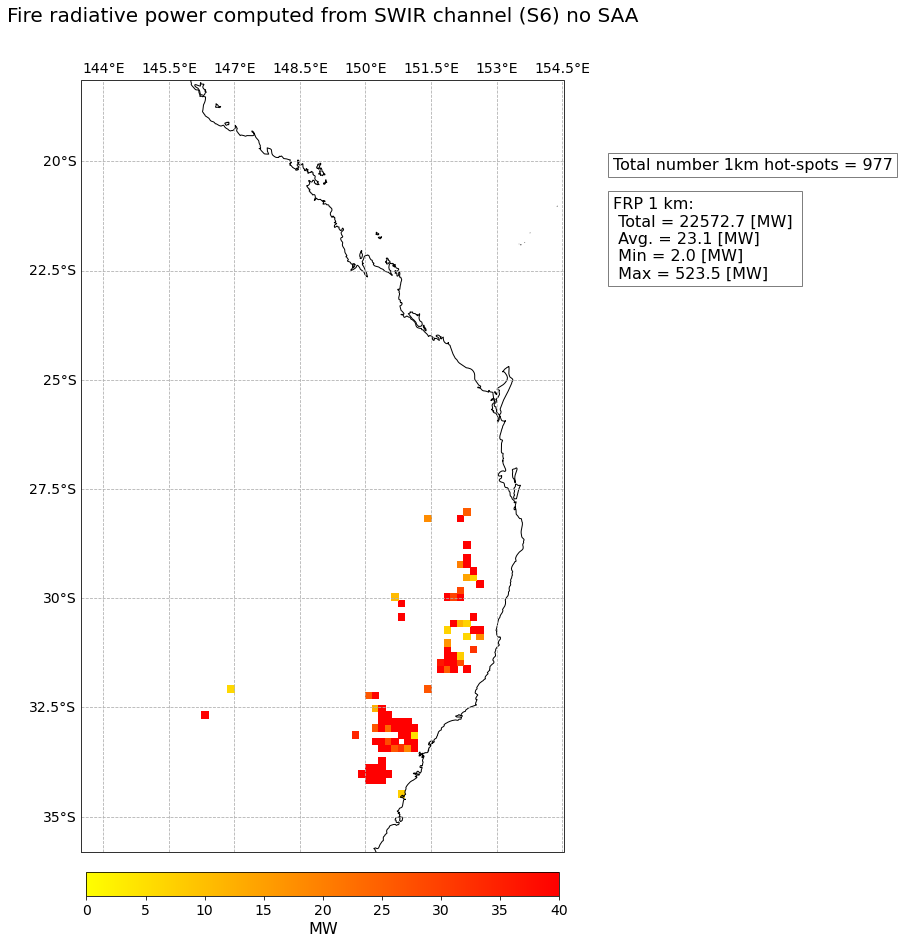

In [45]:
long_name = frp_swir.long_name
unit = frp_swir.units
vmax = FRP_plot_max_grid

visualize_s3_frp(data=D_swir_NoSAA[:,:],
                 lat=lat_grid, 
                 lon=lon_grid, 
                 unit=unit, 
                 longname=long_name + ' no SAA', 
                 textstr_1=textstr_1, 
                 textstr_2=textstr_2, 
                 vmax=FRP_plot_max_grid)

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./251_Sentinel-3_OLCI_L1_load_browse.ipynb"><< 251 - Sentinel-3 OLCI - Level 1</a><span style="float:right;"><a href="./253_Sentinel-3_SLSTR_NRT_AOD_load_browse.ipynb">253 - Sentinel-3 SLSTR NRT - Aerosol Optical Depth >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>